In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd 

df=pd.read_excel('df.xlsx')
df1 = df[(df['year']==98) | (df['year']==1401)]
df1

incomes = df1['sum_netincome_w_m']
spent   = df1['Costs_sum']  


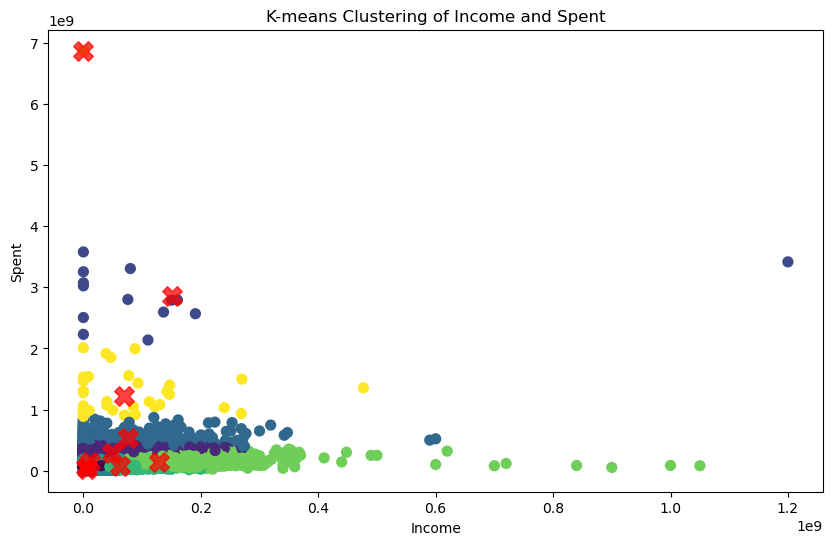

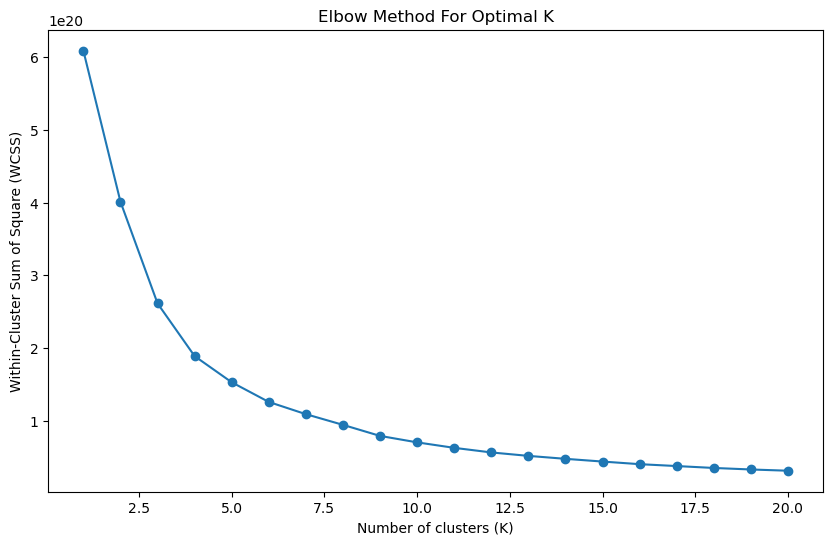

k = 9


In [22]:

#######################
# clustering part one #
#######################

data = np.vstack((incomes, spent)).T

K = 10
kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
kmeans.fit(data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
# plt.xlim(0, 0.6 * 1e9)
# plt.ylim(0, 4 * 1e9)
plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('K-means Clustering of Income and Spent')
plt.show()

#######################
# clustering part two #
#######################

wcss = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Square (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

print("k = 9")
